In [1]:
## <strong style="color:#5e17eb">  </strong>


<img src="https://substackcdn.com/image/fetch/$s_!AsEp!,w_1456,c_limit,f_webp,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F5cadb3a0-fd07-42c3-92be-f2d91839781e_3840x2160.png">

Image Source - https://www.blog.datawithbaraa.com/p/sql-joins-are-really-easy-and-fun

Joining Reference- https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.DataFrame.join.html


### <strong style="color:#5e17eb"> 1. Introduction to Joins </strong>

* 1.1 What is a Join?
  – Combining two DataFrames on matching keys.
* **1.2 Difference Between Join & Merge** – Terminology in Polars vs Pandas.
* **1.3 When to Use Joins** – Common business/data analysis scenarios.
* **1.4 Join vs Concat** – Row-wise vs column-wise combining.

---


<img src="https://i.pinimg.com/736x/0f/a7/91/0fa7915177e311d0760c4d6ffe679bfa.jpg">

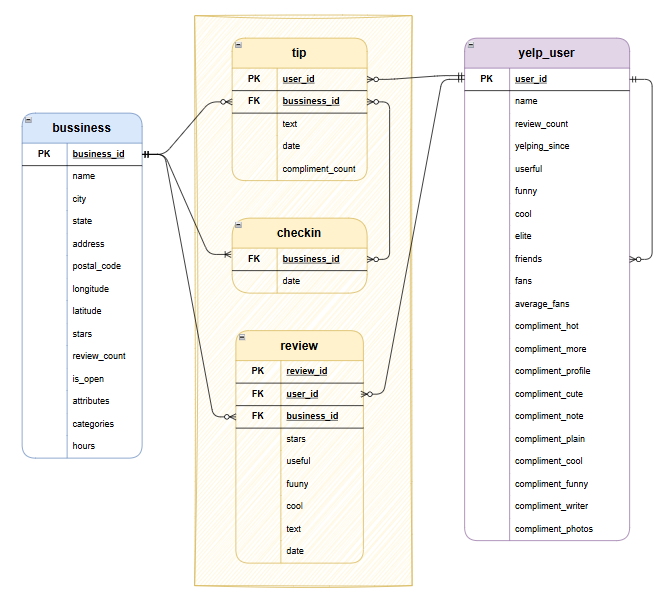

In [ ]:
import polars as pl
from warnings import filterwarnings

filterwarnings('ignore')


### <strong style="color:#5e17eb"> 2. Core Join Syntax</strong>

* **2.1 `df.join(other, on=..., how=...)`** – Basic usage.
* **2.2 Parameters**

  * `on` – Single key
  * `left_on` / `right_on` – Different column names
  * `how` – Join type selector
  * `suffix` – Handling overlapping column names.
* **2.3 Join Return Type** – Always returns a new DataFrame (immutable).

---

In [3]:
business_lf = pl.scan_parquet(r"C:\Users\Rudra\Desktop\yelp\parquet-data\business.parquet")
checkin_lf = pl.scan_parquet(r"C:\Users\Rudra\Desktop\yelp\parquet-data\checkin.parquet")
review_lf = pl.scan_parquet(r"C:\Users\Rudra\Desktop\yelp\parquet-data\review.parquet")
tip_lf = pl.scan_parquet(r"C:\Users\Rudra\Desktop\yelp\parquet-data\tip.parquet")
user_lf = pl.scan_parquet(r"C:\Users\Rudra\Desktop\yelp\parquet-data\yelp_user.parquet")



### <strong style="color:#5e17eb"> 3. Types of Joins  </strong>

* **3.1 Inner Join**

  * Keep only matching keys.
  * Example: `how="inner"`
* **3.2 Left Join**

  * Keep all rows from left DataFrame.
  * Example: `how="left"`
* **3.3 Right Join**

  * Keep all rows from right DataFrame.
  * Example: `how="right"`
* **3.4 Outer Join**

  * Keep all rows from both DataFrames.
  * Example: `how="outer"`
* **3.5 Semi Join**

  * Keep only rows from left that match.
  * Example: `how="semi"`
* **3.6 Anti Join**

  * Keep rows from left with no match in right.
  * Example: `how="anti"`

---


In [12]:
tip_lf.join(checkin_lf, on="business_id", how="left").collect_schema()

Schema([('user_id', String),
        ('business_id', String),
        ('text', String),
        ('date', String),
        ('compliment_count', Int64),
        ('date_right', String)])

In [ ]:
# Semi Example
tip_lf.join(business_lf, on="business_id", how="semi").collect_schema()

Schema([('user_id', String),
        ('business_id', String),
        ('text', String),
        ('date', String),
        ('compliment_count', Int64)])

In [17]:
# Anti Example
business_lf.join(review_lf, on="business_id", how="anti").collect_schema()

Schema([('business_id', String),
        ('name', String),
        ('address', String),
        ('city', String),
        ('state', String),
        ('postal_code', String),
        ('latitude', Float64),
        ('longitude', Float64),
        ('stars', Float64),
        ('review_count', Int64),
        ('is_open', Int64),
        ('attributes', String),
        ('categories', String),
        ('hours', String)])



### <strong style="color:#5e17eb"> 4. Special Join Variants  </strong>

* **4.1 Cross Join**

  * Cartesian product – `how="cross"`
* **4.2 As-of Join**

  * Nearest match based on ordering (time-series friendly).
  * Parameters: `by`, `tolerance`, `strategy`.
* **4.3 Join on Multiple Keys**

  * Example: `on=["city", "state"]`
* **4.4 Self Join**

  * Joining a DataFrame with itself.

---

In [19]:
# Multiple Keys
review_lf.join(user_lf, on=['user_id', 'useful', 'funny', 'cool']).collect_schema()

Schema([('review_id', String),
        ('user_id', String),
        ('business_id', String),
        ('stars', Int64),
        ('useful', Int64),
        ('funny', Int64),
        ('cool', Int64),
        ('text', String),
        ('date', String),
        ('name', String),
        ('review_count', Int64),
        ('yelping_since', String),
        ('elite', String),
        ('friends', String),
        ('fans', Int64),
        ('average_stars', Float64),
        ('compliment_hot', Int64),
        ('compliment_more', Int64),
        ('compliment_profile', Int64),
        ('compliment_cute', Int64),
        ('compliment_list', Int64),
        ('compliment_note', Int64),
        ('compliment_plain', Int64),
        ('compliment_cool', Int64),
        ('compliment_funny', Int64),
        ('compliment_writer', Int64),
        ('compliment_photos', Int64)])

In [13]:
business_lf.collect_schema()

Schema([('business_id', String),
        ('name', String),
        ('address', String),
        ('city', String),
        ('state', String),
        ('postal_code', String),
        ('latitude', Float64),
        ('longitude', Float64),
        ('stars', Float64),
        ('review_count', Int64),
        ('is_open', Int64),
        ('attributes', String),
        ('categories', String),
        ('hours', String)])

In [5]:
checkin_lf.collect_schema()

Schema([('business_id', String), ('date', String)])


### <strong style="color:#5e17eb"> 5. Performance & Memory Tips  </strong>

* **5.1 Sorting Before As-of Joins**
* **5.2 Data Type Matching Before Join**
* **5.3 Using `lazy` API for Large Joins**
* **5.4 Avoiding Duplicate Columns with `suffix`**
* **5.5 Join Key Cardinality and Performance**

---


In [6]:
review_lf.collect_schema()

Schema([('review_id', String),
        ('user_id', String),
        ('business_id', String),
        ('stars', Int64),
        ('useful', Int64),
        ('funny', Int64),
        ('cool', Int64),
        ('text', String),
        ('date', String)])

In [7]:
tip_lf.collect_schema()

Schema([('user_id', String),
        ('business_id', String),
        ('text', String),
        ('date', String),
        ('compliment_count', Int64)])

In [8]:
user_lf.collect_schema()

Schema([('user_id', String),
        ('name', String),
        ('review_count', Int64),
        ('yelping_since', String),
        ('useful', Int64),
        ('funny', Int64),
        ('cool', Int64),
        ('elite', String),
        ('friends', String),
        ('fans', Int64),
        ('average_stars', Float64),
        ('compliment_hot', Int64),
        ('compliment_more', Int64),
        ('compliment_profile', Int64),
        ('compliment_cute', Int64),
        ('compliment_list', Int64),
        ('compliment_note', Int64),
        ('compliment_plain', Int64),
        ('compliment_cool', Int64),
        ('compliment_funny', Int64),
        ('compliment_writer', Int64),
        ('compliment_photos', Int64)])


### <strong style="color:#5e17eb"> 6. Advanced Join Use-Cases </strong>


* **6.1 Conditional Joins with Expressions**
* **6.2 Joining with Computed Columns**
* **6.3 Joining with Aggregations**
* **6.4 Chained Joins**
* **6.5 Combining Join with Filter for Faster Pipelines**

---



### <strong style="color:#5e17eb"> 7. Merging vs Concatenation  </strong>

* **7.1 `pl.concat([df1, df2], how="vertical")`**
* **7.2 `pl.concat([df1, df2], how="horizontal")`**
* **7.3 When to Choose Merge Over Concat**

---


In [ ]:
# Concat example
business_1 = business_lf.head(100)
business_2 = business_lf.tail(100)

pl.concat([business_1, business_2], how='vertical').head(2).collect()

business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
str,str,str,str,str,str,f64,f64,f64,i64,i64,str,str,str
"""Pns2l4eNsfO8kk83dixA6A""","""Abby Rappoport, LAC, CMQ""","""1616 Chapala St, Ste 2""","""Santa Barbara""","""CA""","""93101""",34.426679,-119.711197,5.0,7,0,"""{'ByAppointmentOnly': 'True'}""","""Doctors, Traditional Chinese M…",null
"""mpf3x-BjTdTEA3yCZrAYPw""","""The UPS Store""","""87 Grasso Plaza Shopping Cente…","""Affton""","""MO""","""63123""",38.551126,-90.335695,3.0,15,1,"""{'BusinessAcceptsCreditCards':…","""Shipping Centers, Local Servic…","""{'Monday': '0:0-0:0', 'Tuesday…"


<div style="text-align: center;">
  <h4 style="
    display: inline-block;
    color: #5e17eb;
    font-family: 'Segoe UI';
    border-left: 5px solid #5e17eb;
    background-color: #F8F9F9;
    padding: 10px 20px;
    border-radius: 5px;
    text-align: left;
  ">
  <b>
    Thank You 💜
    </b>
  </h4>
</div>